# Portfolio Cohort Analysis and RFM Analysis with Python


In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('transaction_data (1).csv')
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19996,19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19997,19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19998,19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [9]:
# drop kolom unnamed

df.drop('Unnamed: 0', axis=1, inplace=True)

# Data Understanding

### Tipe Data

In [10]:
# tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   CustomerID               20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
 13  InvoiceDate              20000 non-null  object 
dtypes: float64(3), int64(3

In [11]:
# Mengubah InvoiceDate Object ke Datetime

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   CustomerID               20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Missing Value

In [13]:
# hitung jumlah missing values
df.isna().sum()

transaction_id               0
product_id                   0
CustomerID                   0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
InvoiceDate                  0
dtype: int64

In [14]:
# menghapus missing value

df.dropna(inplace=True)
df.isna().sum()

transaction_id             0
product_id                 0
CustomerID                 0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
InvoiceDate                0
dtype: int64

### Duplicate Data

In [15]:
# menghitung jumlah duplikat
df.duplicated().sum()

0

### Variable Numerik

In [ ]:
# mengambil yang numerik aja
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk
numerik

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
0,1,2,2950,71.49,53.62,41245.0
1,2,3,3120,2091.47,388.92,41701.0
2,3,37,402,1793.43,248.82,36361.0
3,4,88,3135,1198.46,381.10,36145.0
4,5,78,787,1765.30,709.48,42226.0
...,...,...,...,...,...,...
19995,19996,51,1018,2005.66,1203.40,37823.0
19996,19997,41,127,416.98,312.74,35560.0
19997,19998,87,2284,1636.90,44.71,40410.0
19998,19999,6,2764,227.88,136.73,38216.0


#### Statistik Deskriptif

In [17]:
# Statistik Deskriptif
numerik.describe()

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,1107.337193,555.585260,38201.758653
std,5779.669087,30.571996,1011.889153,582.662400,405.596541,2878.067854
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000
25%,4976.000000,18.000000,857.000000,575.270000,215.140000,35667.000000
50%,9985.000000,45.000000,1741.000000,1163.890000,507.580000,38216.000000
75%,14997.000000,72.000000,2615.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,2091.470000,1759.850000,42710.000000


#### Distribusi Data

Grafik Histogram

In [18]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

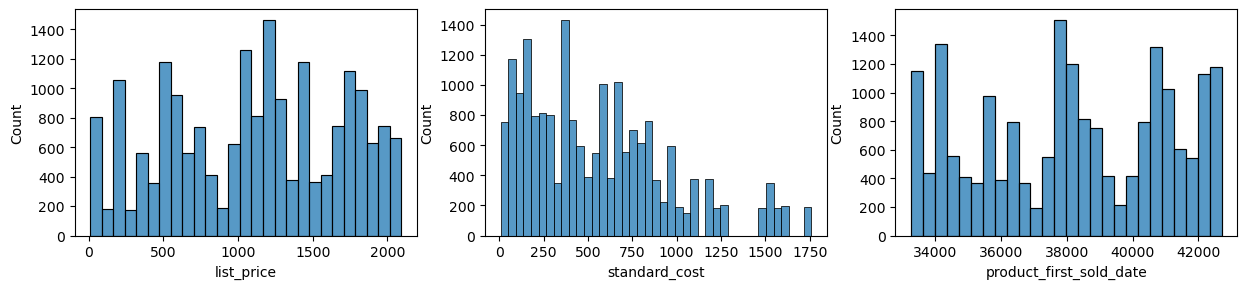

In [19]:
# atur size dari figure
plt.figure(figsize = (15,10)) # kolom, baris

plt.subplot(3,3,1) # jumlah baris, jumlah kolom, posisi
sns.histplot(df['list_price'])

plt.subplot(3,3,2) # jumlah baris, jumlah kolom, posisi
sns.histplot(df['standard_cost'])

plt.subplot(3,3,3) # jumlah baris, jumlah kolom, posisi
sns.histplot(df['product_first_sold_date'])

plt.show()

Uji Statistik Distribusi Normal

In [20]:
df_copy = df.copy()
df_copy.dropna(inplace=True) # menghapus missing values

In [21]:
# Kolmogorov Smirnov Test

from scipy.stats import kstest


for nama_kolom in numerik.columns:
    stat, pval = kstest(df_copy[nama_kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {nama_kolom} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom}Distribusi normal (Terima H0)')

Kolom transaction_id Distribusi tidak normal (Tolak H0)
Kolom product_id Distribusi tidak normal (Tolak H0)
Kolom CustomerID Distribusi tidak normal (Tolak H0)
Kolom list_price Distribusi tidak normal (Tolak H0)
Kolom standard_cost Distribusi tidak normal (Tolak H0)
Kolom product_first_sold_date Distribusi tidak normal (Tolak H0)


In [22]:
# D'Agustino Pearson
from scipy.stats import normaltest

for kolom in numerik.columns:
    stat, pval = normaltest(df_copy[kolom])
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi transaction_id tidak normal (Tolak H0)
Distribusi product_id tidak normal (Tolak H0)
Distribusi CustomerID tidak normal (Tolak H0)
Distribusi list_price tidak normal (Tolak H0)
Distribusi standard_cost tidak normal (Tolak H0)
Distribusi product_first_sold_date tidak normal (Tolak H0)


#### Outlier

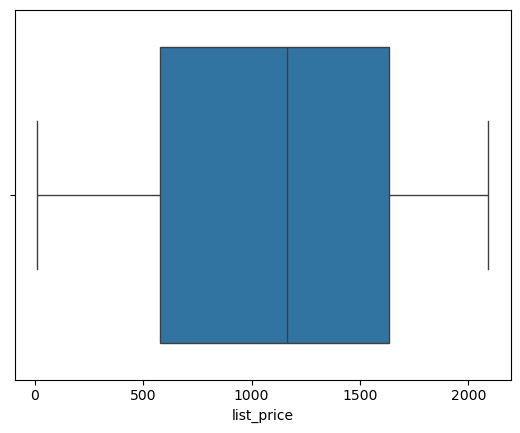

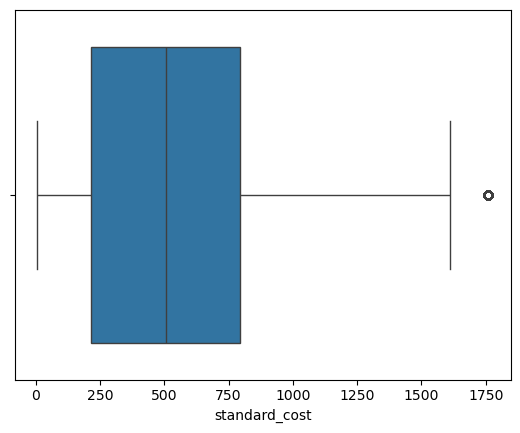

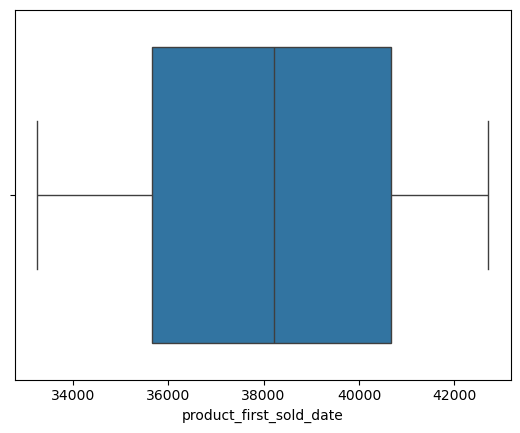

In [23]:
# Boxplot

sns.boxplot(x = df['list_price'])
plt.show()

sns.boxplot(x = df['standard_cost'])
plt.show()

sns.boxplot(x = df['product_first_sold_date'])
plt.show()

In [24]:
# IQR 1.5
for nama_kolom in numerik.columns:
    q3 = df[nama_kolom].quantile(0.75)
    q1 = df[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > batas_atas) | (df[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')


Jumlah Outliers transaction_id: 0
Jumlah Outliers product_id: 0
Jumlah Outliers CustomerID: 0
Jumlah Outliers list_price: 0
Jumlah Outliers standard_cost: 189
Jumlah Outliers product_first_sold_date: 0


#### Korelasi

In [25]:
numerik.corr()

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
transaction_id,1.000000,-0.011633,0.002779,-0.006391,-0.002293,0.004391
product_id,-0.011633,1.000000,0.003369,0.090085,0.038830,-0.054155
CustomerID,0.002779,0.003369,1.000000,0.011671,0.006870,-0.002306
list_price,-0.006391,0.090085,0.011671,1.000000,0.551666,0.059164
standard_cost,-0.002293,0.038830,0.006870,0.551666,1.000000,0.030714
product_first_sold_date,0.004391,-0.054155,-0.002306,0.059164,0.030714,1.000000


<Axes: >

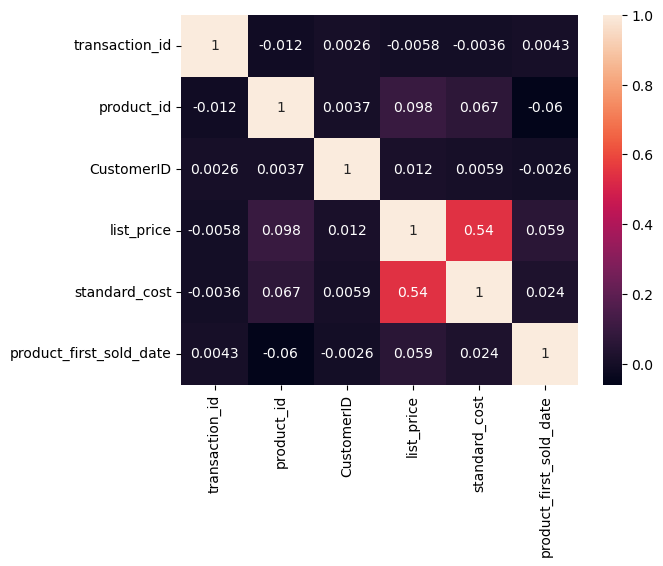

In [26]:
# data dengan distribusi tidak normal
sns.heatmap(numerik.corr(method='spearman'), annot=True) # defaultnya pearson

### Variable Kategorik

In [27]:
# ambil yang kategorik saja
kategorik = df.select_dtypes(exclude = 'number') # sama saja
kategorik = df.select_dtypes(include = 'object') # sama saja
kategorik

,online_order,order_status,brand,product_line,product_class,product_size
0,False,Approved,Solex,Standard,medium,medium
1,True,Approved,Trek Bicycles,Standard,medium,large
2,False,Approved,OHM Cycles,Standard,low,medium
3,False,Approved,Norco Bicycles,Standard,medium,medium
4,True,Approved,Giant Bicycles,Standard,medium,large
...,...,...,...,...,...,...
19995,True,Approved,OHM Cycles,Standard,high,medium
19996,True,Approved,Solex,Road,medium,medium
19997,True,Approved,OHM Cycles,Standard,medium,medium
19998,False,Approved,OHM Cycles,Standard,high,medium


Statistik Deskriptif

In [28]:
kategorik.describe()

,online_order,order_status,brand,product_line,product_class,product_size
count,19445,19445,19445,19445,19445,19445
unique,2,2,6,4,3,3
top,True,Approved,Solex,Standard,medium,medium
freq,9739,19273,4169,13920,13587,12767


Unique Value

In [29]:
kategorik.nunique()

online_order     2
order_status     2
brand            6
product_line     4
product_class    3
product_size     3
dtype: int64

<Axes: >

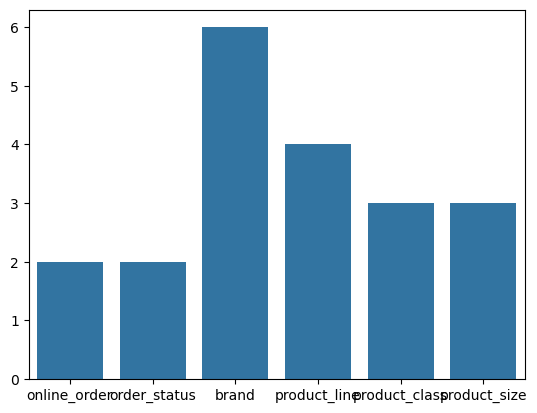

In [30]:
# bar plot
sns.barplot(kategorik.nunique())


Value Count

In [31]:
# menghitung berapa count untuk setiap value
df['brand'].value_counts()

brand
Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: count, dtype: int64

Tren Transaksi per bulan

In [39]:
# Hitung jumlah transaksi per bulan dengan format datetime
df["month"] = df["transaction_date"].dt.strftime("%B")

# Hitung jumlah transaksi per bulan
monthly_sales = df.groupby("month")["transaction_id"].count()

# Urutkan berdasarkan urutan bulan
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
monthly_sales = monthly_sales.reindex(month_order)

# Tampilkan hasil untuk verifikasi
monthly_sales


month
January      1634
February     1578
March        1597
April        1613
May          1641
June         1537
July         1670
August       1703
September    1534
October      1723
November     1607
December     1608
Name: transaction_id, dtype: int64

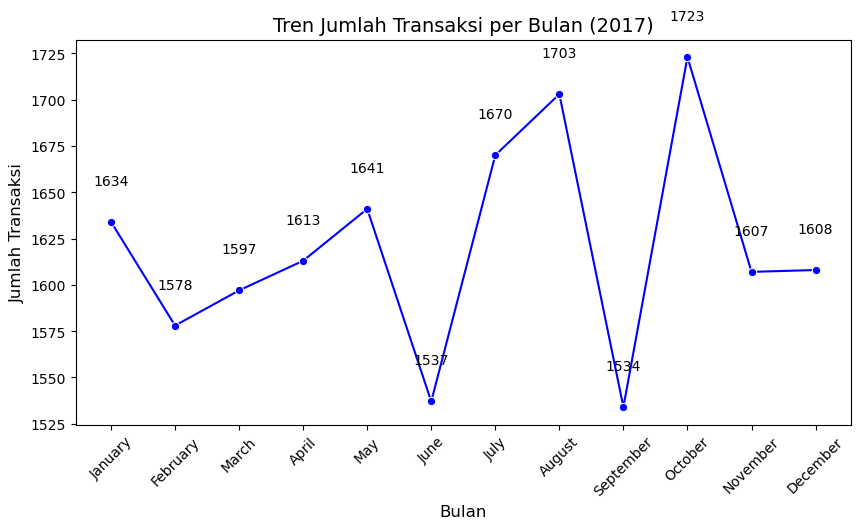

In [40]:
# Plot line chart jumlah transaksi per bulan dengan nilai di setiap titik
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linestyle="-", color="b")

# Tambahkan label angka di setiap titik data
for i, value in enumerate(monthly_sales.values):
    plt.text(i, value + 20, str(value), ha="center", fontsize=10, color="black")

# Tambahkan label dan judul
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.title("Tren Jumlah Transaksi per Bulan (2017)", fontsize=14)
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()


# RFM

In [42]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 non-nu

In [43]:
# handling cancel

df = df[df['order_status'] != 'Cancelled']
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,month,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,February,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,May,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,October,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,August,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,October,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,June,802.26
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,November,104.24
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,April,1592.19
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,July,91.15


## Recency

In [44]:
# mencari hari terakhir pada data (tanggal terkini)

current_date = df['InvoiceDate'].max()
current_date

Timestamp('2017-12-30 00:00:00')

In [45]:
# mencari tanggal terakhir (last transaction) untuk setiap customer

last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

CustomerID
1      2017-12-23
2      2017-08-24
3      2017-09-19
4      2017-06-18
5      2017-12-14
          ...    
3497   2017-11-08
3498   2017-08-25
3499   2017-11-09
3500   2017-08-08
5034   2017-10-07
Name: InvoiceDate, Length: 3490, dtype: datetime64[ns]

In [46]:
# mencari selisih antara tanggal terkini (current date) dengan tanggal terakhir customer belanja (last transaction)

current_date - last_transaction

CustomerID
1        7 days
2      128 days
3      102 days
4      195 days
5       16 days
         ...   
3497    52 days
3498   127 days
3499    51 days
3500   144 days
5034    84 days
Name: InvoiceDate, Length: 3490, dtype: timedelta64[ns]

In [47]:
recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

CustomerID
1         7
2       128
3       102
4       195
5        16
       ... 
3497     52
3498    127
3499     51
3500    144
5034     84
Name: Recency, Length: 3490, dtype: int64

## Frequency

In [48]:
# mencari seberapa banyak customer yang telah melakukan pembelian

frequency = df.groupby('CustomerID')['transaction_date'].nunique()
frequency = frequency.rename('Frequency')
frequency

CustomerID
1       11
2        3
3        7
4        2
5        6
        ..
3497     3
3498     6
3499     7
3500     6
5034     3
Name: Frequency, Length: 3490, dtype: int64

## Monetary

In [49]:
# mencari seberapa banyak customer yang telah melakukan pembelian (total nominal dari barang yang dibeli)

monetary = df.groupby('CustomerID')['list_price'].sum()
monetary = monetary.rename('Monetary')
monetary

CustomerID
1       9084.45
2       4149.07
3       9525.22
4       1047.72
5       5903.20
         ...   
3497    3744.07
3498    5177.06
3499    7673.48
3500    4922.41
5034    1519.92
Name: Monetary, Length: 3490, dtype: float64

## DataFrame RFM

In [50]:
# DataFrame RFM 

rfm = pd.DataFrame({
    'Recency': recency, 
    'Frequency': frequency, 
    'Monetary': monetary}).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,7,9525.22
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3485,3497,52,3,3744.07
3486,3498,127,6,5177.06
3487,3499,51,7,7673.48
3488,3500,144,6,4922.41


## Describe RFM

In [51]:
# Describe RFM

round(rfm.describe(), 2) #dibulatkan 2 angka di belakang koma

,CustomerID,Recency,Frequency,Monetary
count,3490.00,3490.00,3490.00,3490.00
mean,1750.09,62.85,5.49,6113.58
std,1011.35,59.37,2.25,2898.02
min,1.00,0.00,1.00,60.34
25%,876.25,18.00,4.00,4023.00
50%,1749.50,45.00,5.00,5829.05
75%,2622.75,88.00,7.00,7934.46
max,5034.00,353.00,14.00,19071.32


## Histogram & Boxplot

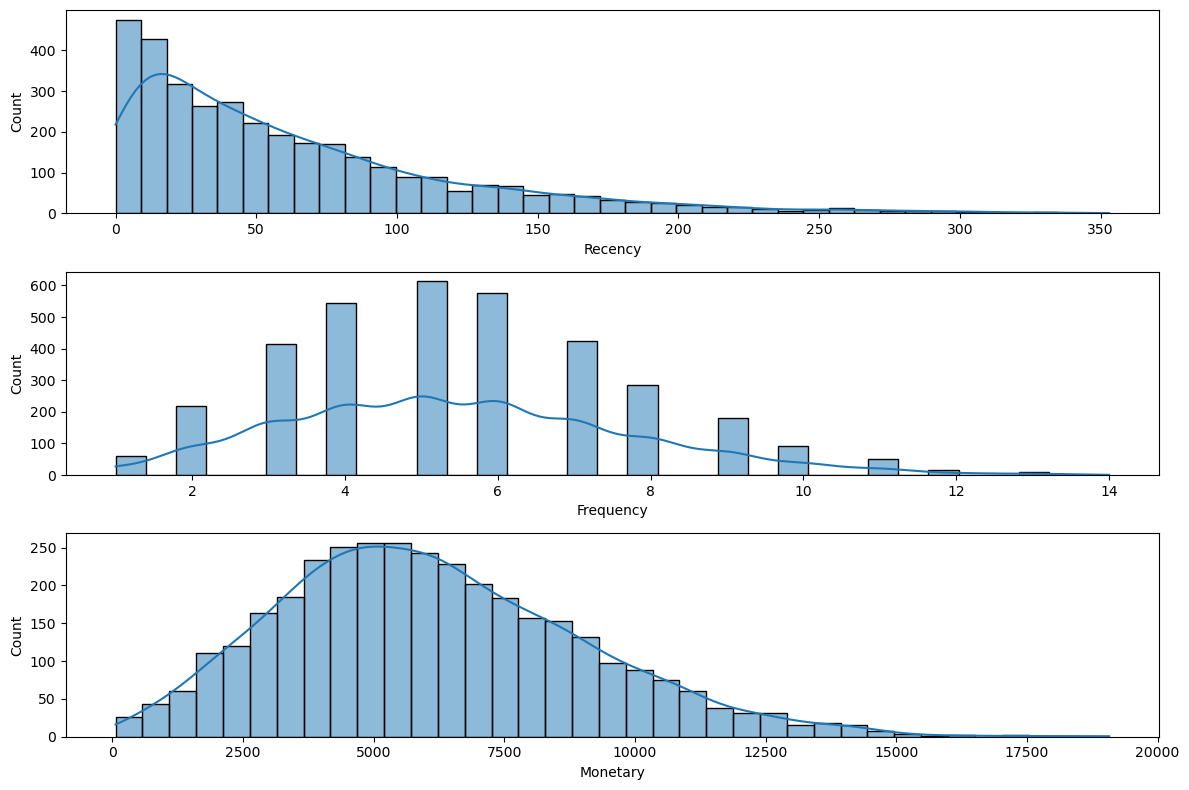

In [52]:
# Histogram

plt.figure(figsize=(12, 8))

plt.subplot(3,1,1) # jumlah baris, jumlah kolom, posisi
sns.histplot(rfm['Recency'], kde=True)

plt.subplot(3,1,2) # jumlah baris, jumlah kolom, posisi
sns.histplot(rfm['Frequency'], kde=True)

plt.subplot(3,1,3) # jumlah baris, jumlah kolom, posisi
sns.histplot(rfm['Monetary'], kde=True)

plt.tight_layout()
plt.show()

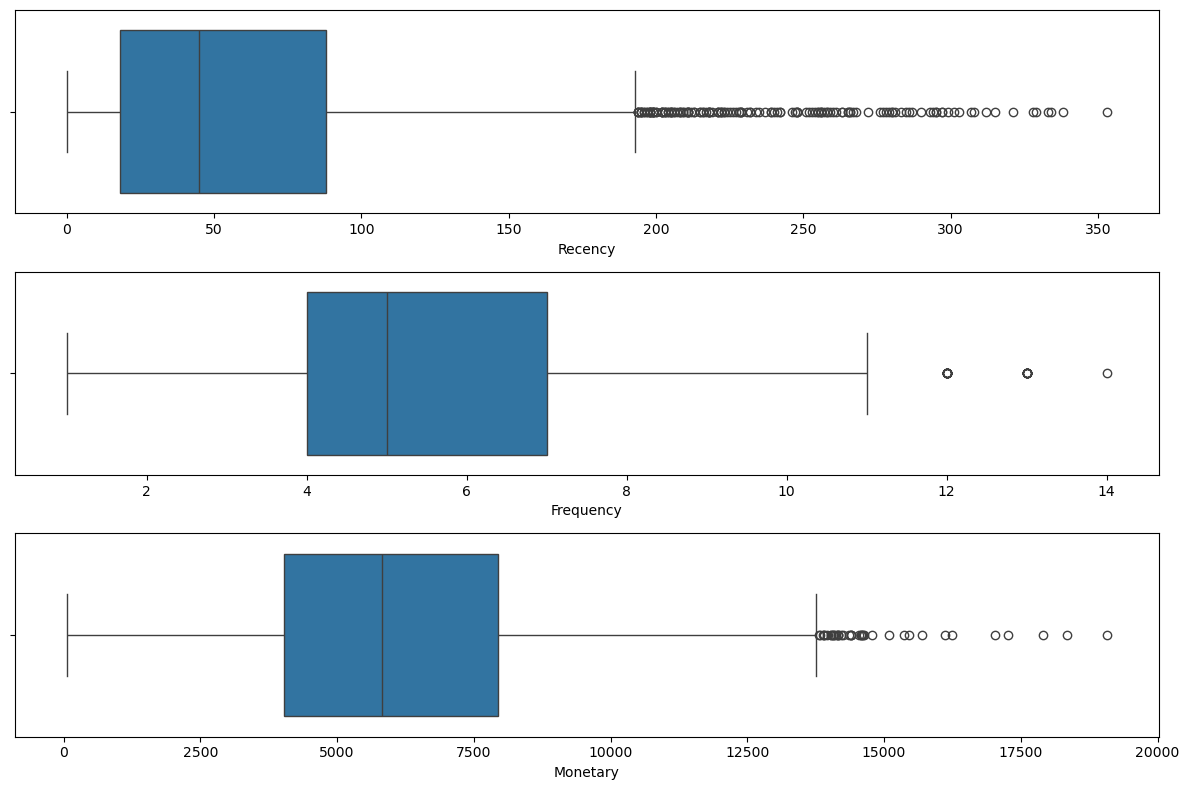

In [53]:
# boxplot

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = rfm['Monetary'])

plt.tight_layout()
plt.show()

- Recency
    - customer kita kebanyaan terakhir membeli sekitar 18-88 hari yang lalu (cukup baru)
- Frequency
    - customer kita kebanyakn baru 4 sampai 7 kali membeli ulang / re purchase
- Monetary
    - customer kita kebanyakan jumlah nominalnya tidak terlalu besar sekitar 600an dollar

## RFM Score

In [54]:
# mendefinisikan score dari statistika deskriptif nya
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3490.000000,3490.000000,3490.000000,3490.000000
mean,1750.092837,62.847564,5.487966,6113.584424
std,1011.348380,59.365082,2.253114,2898.017543
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,18.000000,4.000000,4023.002500
50%,1749.500000,45.000000,5.000000,5829.050000
75%,2622.750000,88.000000,7.000000,7934.462500
max,5034.000000,353.000000,14.000000,19071.320000


In [55]:
# mendefinisikan RFM Score

def rfm_score(x):
    
    # Recency
    if x['Recency'] <= 18: # Q1
        recency_score = 4
    elif x['Recency'] <= 45: # Q2
        recency_score = 3
    elif x['Recency'] <= 88: # Q3
        recency_score = 2
    else:
        recency_score = 1
    
    # Frequency
    if x['Frequency'] <= 4: # Q1
        frequency_score = 1
    elif x['Frequency'] <= 5: # Q2
        frequency_score = 2
    elif x['Frequency'] <= 7: # Q3
        frequency_score = 3
    else:
        frequency_score = 4
    
    # Monetary
    if x['Monetary'] <= 4000: # Q1
        monetary_score = 1
    elif x['Monetary'] <= 5800: # Q2
        monetary_score = 2
    elif x['Monetary'] <= 7900: # Q3
        monetary_score = 3
    else:
        monetary_score = 4

    return pd.Series({'R_Score': recency_score, 'F_Score': frequency_score, 'M_Score': monetary_score})

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,4,4,4,12
1,2,128,3,4149.07,1,1,2,4
2,3,102,7,9525.22,1,3,4,8
3,4,195,2,1047.72,1,1,1,3
4,5,16,6,5903.20,4,3,3,10
...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4
3486,3498,127,6,5177.06,1,3,2,6
3487,3499,51,7,7673.48,2,3,3,8
3488,3500,144,6,4922.41,1,3,2,6


In [56]:
pd.Series({'R_Score': 3, 'F_Score': 4, 'M_Score': 2})

R_Score    3
F_Score    4
M_Score    2
dtype: int64

### RFM Segmentation

In [57]:
# RFM Segmentation

rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Diamonds'
    elif recency >= 3 and fm_combined >= 3:
        return 'Titanium'
    elif recency >= 2 and fm_combined >= 3:
        return 'Gold'
    elif recency >= 3 and fm_combined <= 2:
        return 'Silver'
    elif recency < 2 and fm_combined >= 3:
        return 'Bronze'
    elif recency < 2 and fm_combined <= 2:
        return 'Paladium'
    else:
        return 'Regular'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,1,7,11,9084.45,4,4,4,12,8,Diamonds
1,2,128,3,4149.07,1,1,2,4,3,Bronze
2,3,102,7,9525.22,1,3,4,8,7,Bronze
3,4,195,2,1047.72,1,1,1,3,2,Paladium
4,5,16,6,5903.20,4,3,3,10,6,Diamonds
...,...,...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4,2,Regular
3486,3498,127,6,5177.06,1,3,2,6,5,Bronze
3487,3499,51,7,7673.48,2,3,3,8,6,Gold
3488,3500,144,6,4922.41,1,3,2,6,5,Bronze


In [58]:
rfm['Customer_Segment'].value_counts()

Customer_Segment
Titanium    820
Diamonds    691
Gold        683
Bronze      530
Paladium    339
Silver      245
Regular     182
Name: count, dtype: int64

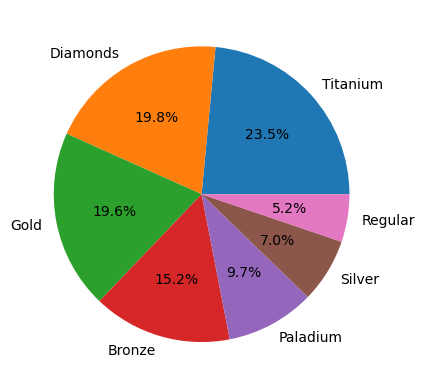

In [59]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()

# Cohort Analysis

## Data Preprocessing

### a. Aquisition Date

In [60]:
# mengekstrak bulan dari invoice date
df['InvoiceDate'].dt.month

0         2
1         5
2        10
3         8
4        10
         ..
19995     6
19996    11
19997     4
19998     7
19999     9
Name: InvoiceDate, Length: 19273, dtype: int32

In [61]:
# mengekstrak tahun bulan dari invoice date
df['InvoiceDate'].dt.to_period('M')

0        2017-02
1        2017-05
2        2017-10
3        2017-08
4        2017-10
          ...   
19995    2017-06
19996    2017-11
19997    2017-04
19998    2017-07
19999    2017-09
Name: InvoiceDate, Length: 19273, dtype: period[M]

In [62]:
# untuk mengetahui date acquisiton / awal mula belanja setiap customer ID
df.groupby('CustomerID')['InvoiceDate'].min()

CustomerID
1      2017-01-05
2      2017-05-04
3      2017-02-23
4      2017-04-03
5      2017-03-03
          ...    
3497   2017-09-01
3498   2017-02-03
3499   2017-01-12
3500   2017-01-09
5034   2017-01-03
Name: InvoiceDate, Length: 3490, dtype: datetime64[ns]

In [63]:
# seperti group by tapi baris data nya dipertahankan (kl di sql kayak over)
df.groupby('CustomerID')['InvoiceDate'].transform('min')

0       2017-02-25
1       2017-01-20
2       2017-01-29
3       2017-02-08
4       2017-01-24
           ...    
19995   2017-01-25
19996   2017-01-03
19997   2017-04-06
19998   2017-02-27
19999   2017-03-26
Name: InvoiceDate, Length: 19273, dtype: datetime64[ns]

In [64]:
# masukin ke dalam data
df['Acquisiton_Date']= df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df

/var/folders/tl/nkgrs2rj2xsby6cq2kdklvxw0000gn/T/ipykernel_38492/2844476218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acquisiton_Date']= df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,month,profit,Acquisiton_Date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,February,17.87,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,May,1702.55,2017-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,October,1544.61,2017-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,August,817.36,2017-02
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,October,1055.82,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,June,802.26,2017-01
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,November,104.24,2017-01
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,April,1592.19,2017-04
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,July,91.15,2017-02


In [65]:
df['Acquisiton_Date'].value_counts()

Acquisiton_Date
2017-01    8150
2017-02    4655
2017-03    2627
2017-04    1749
2017-05     963
2017-06     529
2017-07     298
2017-08     164
2017-09      62
2017-10      44
2017-11      24
2017-12       8
Freq: M, Name: count, dtype: int64

### b. Transaction Month

In [66]:
df['Transaction Month'] = df['InvoiceDate'].dt.to_period('M')
df

/var/folders/tl/nkgrs2rj2xsby6cq2kdklvxw0000gn/T/ipykernel_38492/3720182160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Month'] = df['InvoiceDate'].dt.to_period('M')


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,month,profit,Acquisiton_Date,Transaction Month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,February,17.87,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,May,1702.55,2017-01,2017-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,October,1544.61,2017-01,2017-10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,August,817.36,2017-02,2017-08
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,October,1055.82,2017-01,2017-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,June,802.26,2017-01,2017-06
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,November,104.24,2017-01,2017-11
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,April,1592.19,2017-04,2017-04
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,July,91.15,2017-02,2017-07


### c. Jumlah user setiap acquisiton date (New User)

In [67]:
cohort_table = df.groupby(['Acquisiton_Date','Transaction Month'])['CustomerID'].nunique()
cohort_table = cohort_table.rename('Jumlah User', inplace=True).reset_index()
cohort_table

,Acquisiton_Date,Transaction Month,Jumlah User
0,2017-01,2017-01,1315
1,2017-01,2017-02,461
2,2017-01,2017-03,475
3,2017-01,2017-04,474
4,2017-01,2017-05,470
...,...,...,...
73,2017-10,2017-11,6
74,2017-10,2017-12,7
75,2017-11,2017-11,15
76,2017-11,2017-12,6


In [68]:
cohort_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Acquisiton_Date    78 non-null     period[M]
 1   Transaction Month  78 non-null     period[M]
 2   Jumlah User        78 non-null     int64    
dtypes: int64(1), period[M](2)
memory usage: 2.0 KB


### d. Period Month

In [69]:
cohort_table['Period Month'] = cohort_table['Transaction Month'].dt.month - cohort_table['Acquisiton_Date'].dt.month
cohort_table

,Acquisiton_Date,Transaction Month,Jumlah User,Period Month
0,2017-01,2017-01,1315,0
1,2017-01,2017-02,461,1
2,2017-01,2017-03,475,2
3,2017-01,2017-04,474,3
4,2017-01,2017-05,470,4
...,...,...,...,...
73,2017-10,2017-11,6,1
74,2017-10,2017-12,7,2
75,2017-11,2017-11,15,0
76,2017-11,2017-12,6,1


### e. Pivot Table

In [70]:
cohort_pivot = cohort_table.pivot_table(index='Acquisiton_Date', columns='Period Month', values='Jumlah User')
cohort_pivot

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisiton_Date,,,,,,,,,,,,
2017-01,1315.0,461.0,475.0,474.0,470.0,455.0,488.0,498.0,469.0,496.0,466.0,489.0
2017-02,794.0,307.0,290.0,304.0,272.0,290.0,301.0,275.0,319.0,295.0,278.0,NaN
2017-03,489.0,168.0,169.0,162.0,177.0,183.0,168.0,203.0,181.0,185.0,NaN,NaN
2017-04,342.0,109.0,120.0,155.0,141.0,120.0,143.0,124.0,131.0,NaN,NaN,NaN
2017-05,217.0,88.0,78.0,87.0,72.0,72.0,73.0,83.0,NaN,NaN,NaN,NaN
2017-06,127.0,48.0,45.0,51.0,48.0,46.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07,84.0,30.0,28.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,54.0,17.0,24.0,19.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,26.0,8.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### f. Ubah jumlah user dalam Persentase

In [71]:
cohort_pivot_per = cohort_pivot.apply(lambda x: x/x.iloc[0]*100, axis = 1)
cohort_pivot_per

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisiton_Date,,,,,,,,,,,,
2017-01,100.0,35.057034,36.121673,36.045627,35.741445,34.600760,37.110266,37.870722,35.665399,37.718631,35.437262,37.186312
2017-02,100.0,38.664987,36.523929,38.287154,34.256927,36.523929,37.909320,34.634761,40.176322,37.153652,35.012594,NaN
2017-03,100.0,34.355828,34.560327,33.128834,36.196319,37.423313,34.355828,41.513292,37.014315,37.832311,NaN,NaN
2017-04,100.0,31.871345,35.087719,45.321637,41.228070,35.087719,41.812865,36.257310,38.304094,NaN,NaN,NaN
2017-05,100.0,40.552995,35.944700,40.092166,33.179724,33.179724,33.640553,38.248848,NaN,NaN,NaN,NaN
2017-06,100.0,37.795276,35.433071,40.157480,37.795276,36.220472,40.944882,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,35.714286,33.333333,39.285714,46.428571,29.761905,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,31.481481,44.444444,35.185185,27.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.769231,30.769231,34.615385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### g. Buat Heatmap

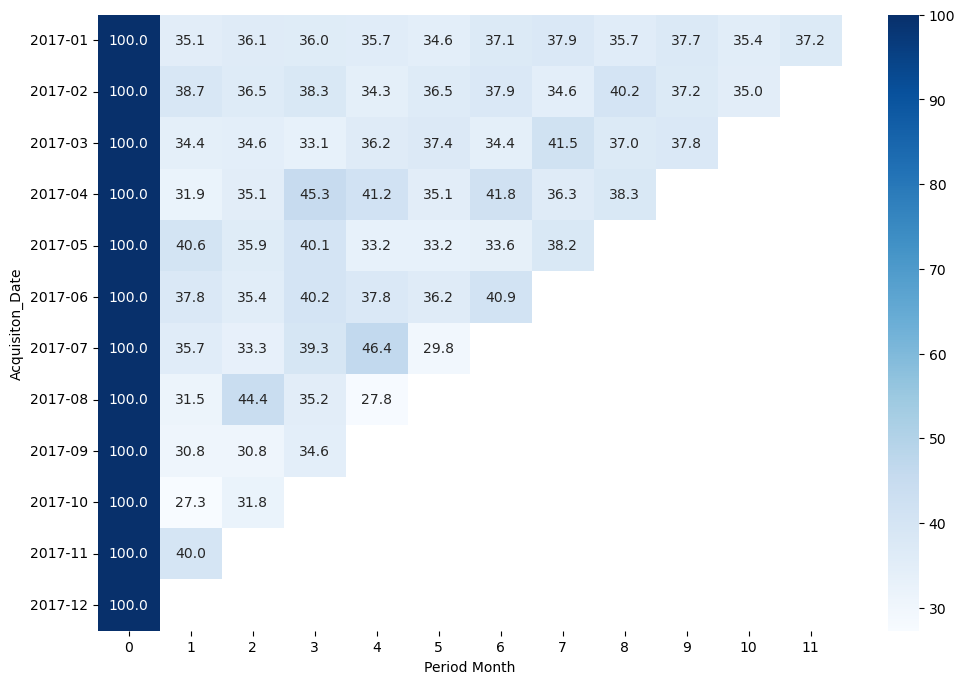

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(cohort_pivot_per, annot=True, cmap='Blues', fmt = '.1f')
plt.show()